In [1]:
import pandas as pd
df = pd.read_csv('housing2.csv')

In [2]:
df.head()

,ATT1,ATT2,ATT3,ATT4,ATT5,ATT6,ATT7,ATT8,ATT9,ATT10,...,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.038327,0.592379,0.655174,0.119839,0.652477,0.984323,0.206738,0.374650,0.463350,0.333610,...,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.225022,0.983103,0.803619,0.836315,0.163104,0.637497,0.008760,0.631190,0.207978,0.880357,...,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.423233,0.375808,0.271293,0.729824,0.886744,0.043703,0.457700,0.862450,0.901924,0.062488,...,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.743370,0.929103,0.589894,0.644012,0.110490,0.774604,0.306483,0.880599,0.630401,0.928894,...,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.378623,0.786609,0.712752,0.110274,0.762133,0.030069,0.316631,0.667073,0.426443,0.400557,...,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


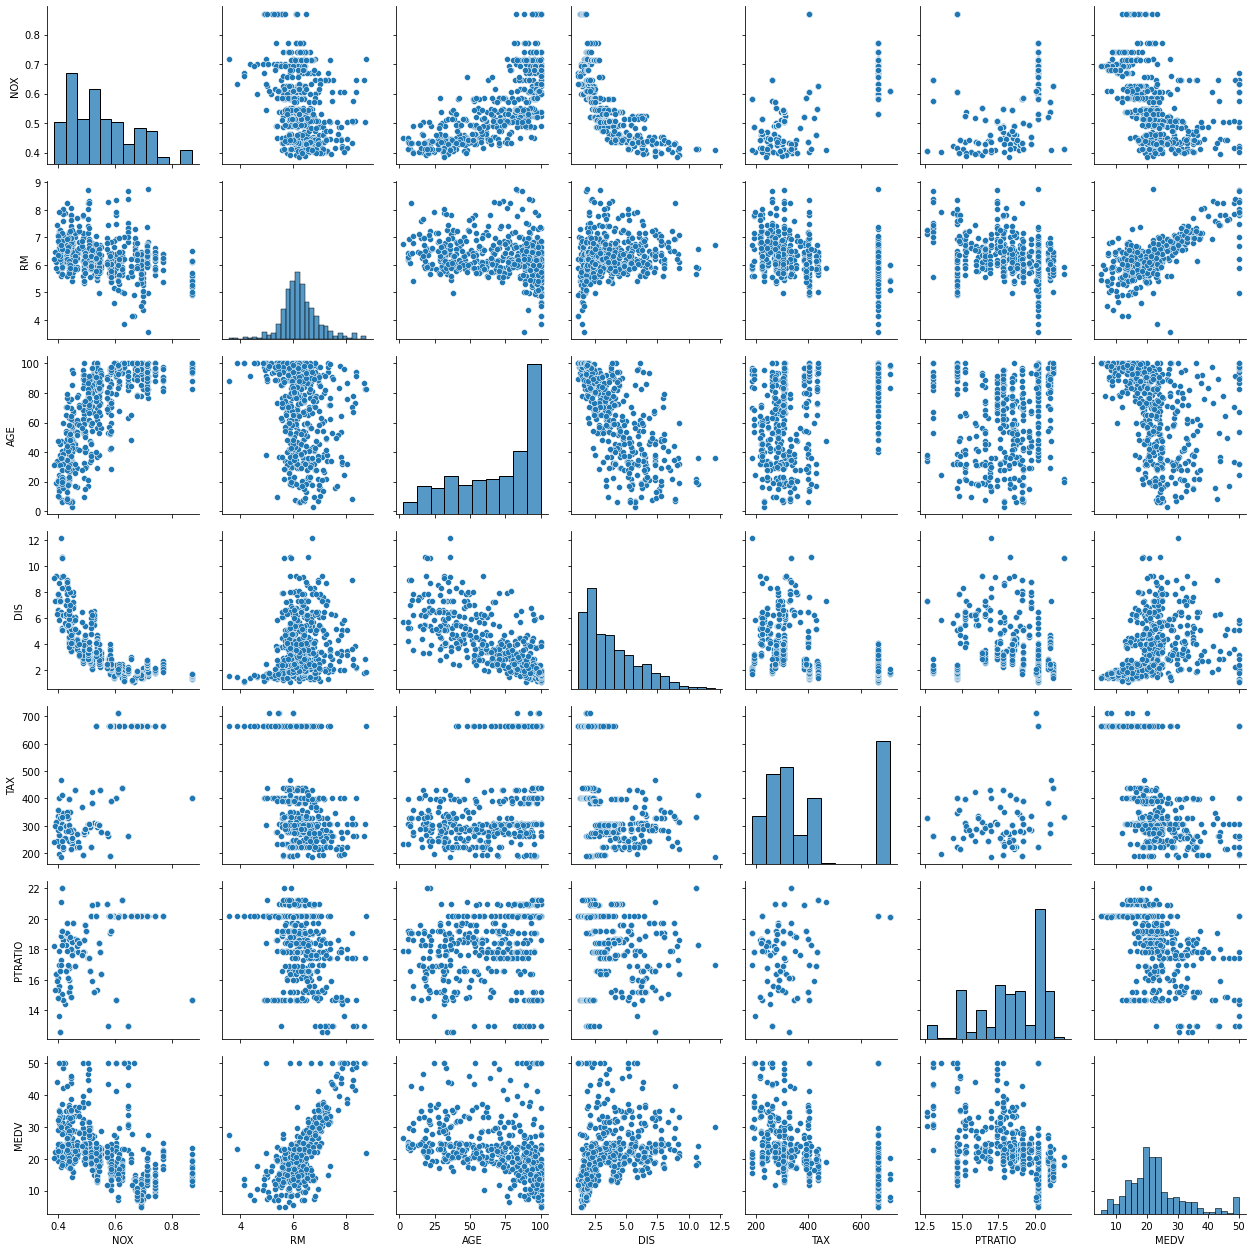

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
cols =['NOX','RM','AGE','DIS','TAX','PTRATIO','MEDV']
sns.pairplot(df[cols])
plt.tight_layout()
plt.show()

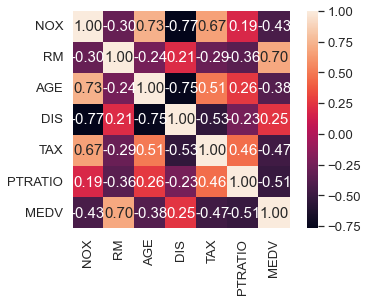

In [4]:
import numpy as np
cm=np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.2)
hm=sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':15},yticklabels=cols,xticklabels=cols)
plt.show()

In [5]:
df.describe()

,ATT1,ATT2,ATT3,ATT4,ATT5,ATT6,ATT7,ATT8,ATT9,ATT10,...,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,...,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.518457,0.500422,0.507451,0.498543,0.525487,0.508831,0.501997,0.509998,0.480159,0.501922,...,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,0.283847,0.298752,0.289607,0.294229,0.283387,0.282400,0.287986,0.290160,0.301086,0.294051,...,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.000727,0.000321,0.000013,0.001541,0.003970,0.000679,0.003653,0.000525,0.001093,0.000263,...,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.272918,0.235879,0.244897,0.229861,0.283208,0.276366,0.271701,0.257320,0.208171,0.248119,...,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.521326,0.485701,0.526014,0.506543,0.514982,0.509443,0.499804,0.508326,0.465558,0.487128,...,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,0.770235,0.774921,0.750546,0.757517,0.772218,0.730899,0.756420,0.768465,0.739580,0.771559,...,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,0.995798,0.999265,0.998746,0.995561,0.998635,0.998194,0.999140,0.997083,0.996714,0.999321,...,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
class LinearRegressionGD(object):
    def __init__(self,eta=0.001,n_iter=20):
        self.eta=eta
        self.n_iter=n_iter
    def fit(self,X,y):
        self.w_ =np.zeros(1+X.shape[1])
        self.cost_ =[]
        
        for i in range(self.n_iter):
            output =self.net_input(X)
            errors =(y-output)
            self.w_[1:]+=self.eta*X.T.dot(errors)
            self.w_[0]+=self.eta*errors.sum()
            cost=(errors**2).sum()/2.0
            self.cost_.append(cost)
        return self
    def net_input(self,X):
        return np.dot(X,self.w_[1:])+self.w_[0]
    def predict (self,X):
        return self.net_input(X)
            

In [7]:
X = df[['RM']].values
y = df['MEDV'].values
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std =sc_x.fit_transform(X)
y_std =sc_y.fit_transform(y[:,np.newaxis]).flatten()
lr = LinearRegressionGD()
lr.fit(X_std,y_std)

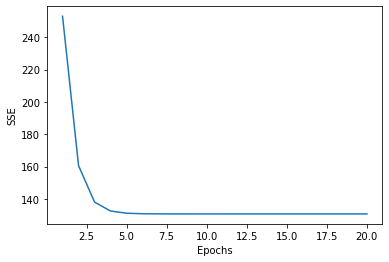

In [8]:
sns.reset_orig()
plt.plot(range(1,lr.n_iter+1),lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epochs')
plt.show()

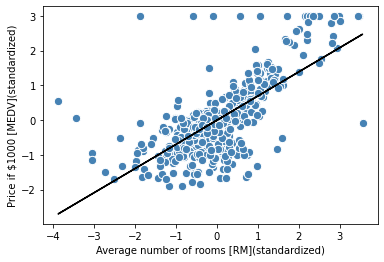

In [9]:
def lin_regplot(X,y,model):
    plt.scatter(X,y,c='steelblue',edgecolor='white',s=70)
    plt.plot(X,model.predict(X),color='black',lw=1.5)
    return None

lin_regplot(X_std,y_std,lr)
plt.xlabel('Average number of rooms [RM](standardized)')
plt.ylabel('Price if $1000 [MEDV](standardized)')
plt.show()

In [10]:
from sklearn.linear_model import LinearRegression
slr =LinearRegression()
slr.fit(X,y)
print('Slope: %.3f'% slr.coef_[0])
print('Intercept: %.3f'% slr.intercept_)

Slope: 9.102
Intercept: -34.671


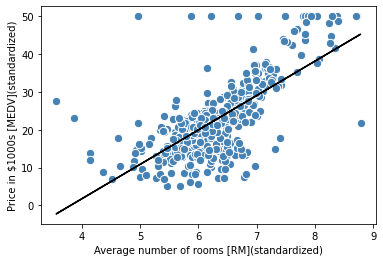

In [11]:
lin_regplot(X,y,slr)
plt.xlabel('Average number of rooms [RM](standardized)')
plt.ylabel('Price in $1000s [MEDV](standardized)')
plt.show()

In [12]:
from sklearn.linear_model import RANSACRegressor
ransac =RANSACRegressor(LinearRegression(),max_trials=100,min_samples=50,loss='absolute_loss',residual_threshold =5,random_state=0)
ransac.fit(X,y)

RANSACRegressor(base_estimator=LinearRegression(), min_samples=50,
                random_state=0, residual_threshold=5)

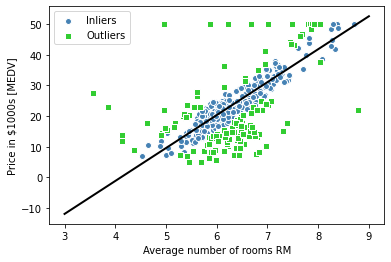

In [13]:
inlier_mask =ransac.inlier_mask_
outlier_mask =np.logical_not(inlier_mask)
line_X =np.arange(3,10,1)
line_y_ransac =ransac.predict(line_X[:,np.newaxis])
plt.scatter(X[inlier_mask],y[inlier_mask],c='steelblue',edgecolor='white',marker='o',label='Inliers')
plt.scatter(X[outlier_mask],y[outlier_mask],c='limegreen',edgecolor='white',marker='s',label='Outliers')
plt.plot(line_X,line_y_ransac,color='black',lw=2)
plt.xlabel('Average number of rooms RM')
plt.ylabel('Price in $1000s [MEDV]')
plt.legend(loc='upper left')
plt.show()

In [14]:
print('Slope: %.3f'% ransac.estimator_.coef_[0])
print('Intercept: %.3f'% ransac.estimator_.intercept_)

Slope: 10.735
Intercept: -44.089


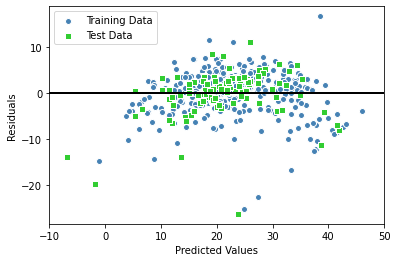

In [15]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1].values
y= df['MEDV'].values
X_train, X_test, y_train ,y_test = train_test_split(X,y, test_size=0.2, random_state=42)
slr=LinearRegression()
slr.fit(X_train,y_train)
y_train_pred =slr.predict(X_train)
y_test_pred =slr.predict(X_test)
plt.scatter(y_train_pred,y_train_pred-y_train,c='steelblue',marker='o',edgecolor='white',label='Training Data')
plt.scatter(y_test_pred,y_test_pred-y_test,c='limegreen',marker='s',edgecolor='white',label='Test Data')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0,xmin =-10,xmax =50,color ='black',lw=2)
plt.xlim([-10,50])
plt.show()

In [16]:
from sklearn.metrics import mean_squared_error
print('MSE train:')
print(mean_squared_error(y_train,y_train_pred))
print('MSE test:')
print(mean_squared_error(y_test,y_test_pred))

MSE train:
20.612846807058926
MSE test:
26.630230484261165


In [17]:
from sklearn.metrics import r2_score
print('R^2 train:')
print(r2_score(y_train,y_train_pred))
print('R^2 test:')
print(r2_score(y_test,y_test_pred))
print('Coefficients: \n', slr.coef_)
print('Y Intercept: \n', slr.intercept_)


R^2 train:
0.762725461446246
R^2 test:
0.636862720882108
Coefficients: 
 [ 2.89556912e+00 -2.40286871e-01  5.59299658e-01 -1.05366827e-01
 -7.67931626e-01 -6.19536586e-01  6.66791594e-01 -2.79369230e-01
 -1.41197737e-01 -1.01755261e+00 -9.66242999e-01  4.57906074e-01
 -1.32764058e-01 -1.27945481e-01  3.23592942e-02  4.02659544e-02
  2.74293085e+00 -1.70235838e+01  4.48169721e+00 -6.42849583e-03
 -1.47039413e+00  2.56793051e-01 -1.05131783e-02 -8.92191033e-01
  1.30869818e-02 -5.01078827e-01]
Y Intercept: 
 29.01184117293078


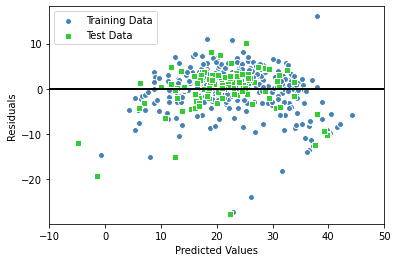

Coefficients: 
 [ 2.89556912e+00 -2.40286871e-01  5.59299658e-01 -1.05366827e-01
 -7.67931626e-01 -6.19536586e-01  6.66791594e-01 -2.79369230e-01
 -1.41197737e-01 -1.01755261e+00 -9.66242999e-01  4.57906074e-01
 -1.32764058e-01 -1.27945481e-01  3.23592942e-02  4.02659544e-02
  2.74293085e+00 -1.70235838e+01  4.48169721e+00 -6.42849583e-03
 -1.47039413e+00  2.56793051e-01 -1.05131783e-02 -8.92191033e-01
  1.30869818e-02 -5.01078827e-01]
Y Intercept: 
 29.01184117293078
MSE train:
21.307051343561326
MSE test:
26.843224934033934
R^2 train:
0.7547344710409749
R^2 test:
0.6339582689284005


In [18]:
# Ridge Regression

from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.1,normalize =True)
ridge.fit(X_train,y_train)
y_train_pred =ridge.predict(X_train)
y_test_pred =ridge.predict(X_test)
plt.scatter(y_train_pred,y_train_pred-y_train,c='steelblue',marker='o',edgecolor='white',label='Training Data')
plt.scatter(y_test_pred,y_test_pred-y_test,c='limegreen',marker='s',edgecolor='white',label='Test Data')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0,xmin =-10,xmax =50,color ='black',lw=2)
plt.xlim([-10,50])
plt.show()
print('Coefficients: \n', slr.coef_)
print('Y Intercept: \n', slr.intercept_)
print('MSE train:')
print(mean_squared_error(y_train,y_train_pred))
print('MSE test:')
print(mean_squared_error(y_test,y_test_pred))
print('R^2 train:')
print(r2_score(y_train,y_train_pred))
print('R^2 test:')
print(r2_score(y_test,y_test_pred))


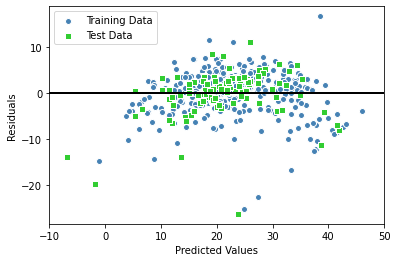

Coefficients: 
 [ 2.89556912e+00 -2.40286871e-01  5.59299658e-01 -1.05366827e-01
 -7.67931626e-01 -6.19536586e-01  6.66791594e-01 -2.79369230e-01
 -1.41197737e-01 -1.01755261e+00 -9.66242999e-01  4.57906074e-01
 -1.32764058e-01 -1.27945481e-01  3.23592942e-02  4.02659544e-02
  2.74293085e+00 -1.70235838e+01  4.48169721e+00 -6.42849583e-03
 -1.47039413e+00  2.56793051e-01 -1.05131783e-02 -8.92191033e-01
  1.30869818e-02 -5.01078827e-01]
Y Intercept: 
 29.01184117293078
MSE train:
20.612846830507294
MSE test:
26.630288809050043
R^2 train:
0.7627254611763318
R^2 test:
0.6368619255489565


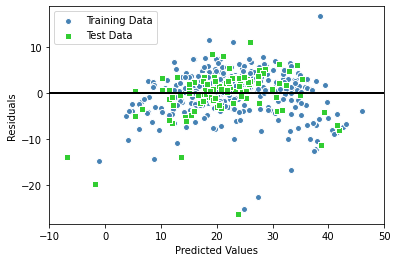

Coefficients: 
 [ 2.89556912e+00 -2.40286871e-01  5.59299658e-01 -1.05366827e-01
 -7.67931626e-01 -6.19536586e-01  6.66791594e-01 -2.79369230e-01
 -1.41197737e-01 -1.01755261e+00 -9.66242999e-01  4.57906074e-01
 -1.32764058e-01 -1.27945481e-01  3.23592942e-02  4.02659544e-02
  2.74293085e+00 -1.70235838e+01  4.48169721e+00 -6.42849583e-03
 -1.47039413e+00  2.56793051e-01 -1.05131783e-02 -8.92191033e-01
  1.30869818e-02 -5.01078827e-01]
Y Intercept: 
 29.01184117293078
MSE train:
20.61284914707
MSE test:
26.630813505718958
R^2 train:
0.7627254345103718
R^2 test:
0.6368547706382686


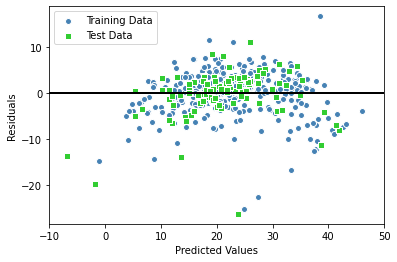

Coefficients: 
 [ 2.89556912e+00 -2.40286871e-01  5.59299658e-01 -1.05366827e-01
 -7.67931626e-01 -6.19536586e-01  6.66791594e-01 -2.79369230e-01
 -1.41197737e-01 -1.01755261e+00 -9.66242999e-01  4.57906074e-01
 -1.32764058e-01 -1.27945481e-01  3.23592942e-02  4.02659544e-02
  2.74293085e+00 -1.70235838e+01  4.48169721e+00 -6.42849583e-03
 -1.47039413e+00  2.56793051e-01 -1.05131783e-02 -8.92191033e-01
  1.30869818e-02 -5.01078827e-01]
Y Intercept: 
 29.01184117293078
MSE train:
20.613076084389057
MSE test:
26.636036497699607
R^2 train:
0.762722822234243
R^2 test:
0.6367835484572277


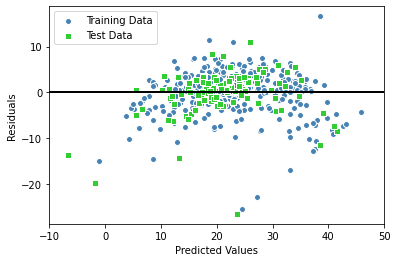

Coefficients: 
 [ 2.89556912e+00 -2.40286871e-01  5.59299658e-01 -1.05366827e-01
 -7.67931626e-01 -6.19536586e-01  6.66791594e-01 -2.79369230e-01
 -1.41197737e-01 -1.01755261e+00 -9.66242999e-01  4.57906074e-01
 -1.32764058e-01 -1.27945481e-01  3.23592942e-02  4.02659544e-02
  2.74293085e+00 -1.70235838e+01  4.48169721e+00 -6.42849583e-03
 -1.47039413e+00  2.56793051e-01 -1.05131783e-02 -8.92191033e-01
  1.30869818e-02 -5.01078827e-01]
Y Intercept: 
 29.01184117293078
MSE train:
20.631889318624758
MSE test:
26.684788998904505
R^2 train:
0.7625062630411455
R^2 test:
0.6361187457005186


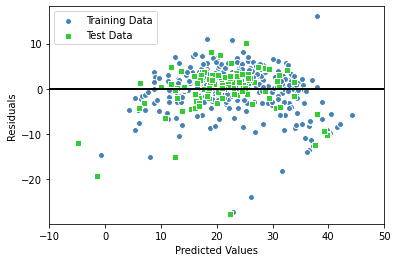

Coefficients: 
 [ 2.89556912e+00 -2.40286871e-01  5.59299658e-01 -1.05366827e-01
 -7.67931626e-01 -6.19536586e-01  6.66791594e-01 -2.79369230e-01
 -1.41197737e-01 -1.01755261e+00 -9.66242999e-01  4.57906074e-01
 -1.32764058e-01 -1.27945481e-01  3.23592942e-02  4.02659544e-02
  2.74293085e+00 -1.70235838e+01  4.48169721e+00 -6.42849583e-03
 -1.47039413e+00  2.56793051e-01 -1.05131783e-02 -8.92191033e-01
  1.30869818e-02 -5.01078827e-01]
Y Intercept: 
 29.01184117293078
MSE train:
21.307051343561326
MSE test:
26.843224934033934
R^2 train:
0.7547344710409749
R^2 test:
0.6339582689284005


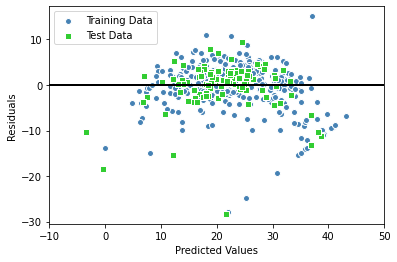

Coefficients: 
 [ 2.89556912e+00 -2.40286871e-01  5.59299658e-01 -1.05366827e-01
 -7.67931626e-01 -6.19536586e-01  6.66791594e-01 -2.79369230e-01
 -1.41197737e-01 -1.01755261e+00 -9.66242999e-01  4.57906074e-01
 -1.32764058e-01 -1.27945481e-01  3.23592942e-02  4.02659544e-02
  2.74293085e+00 -1.70235838e+01  4.48169721e+00 -6.42849583e-03
 -1.47039413e+00  2.56793051e-01 -1.05131783e-02 -8.92191033e-01
  1.30869818e-02 -5.01078827e-01]
Y Intercept: 
 29.01184117293078
MSE train:
22.249769394875663
MSE test:
26.8447219279766
R^2 train:
0.7438828408558953
R^2 test:
0.6339378554998529


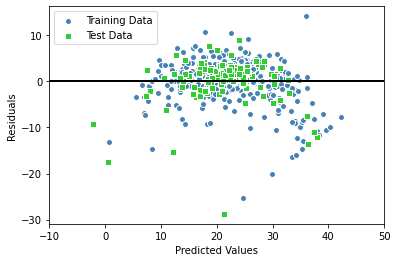

Coefficients: 
 [ 2.89556912e+00 -2.40286871e-01  5.59299658e-01 -1.05366827e-01
 -7.67931626e-01 -6.19536586e-01  6.66791594e-01 -2.79369230e-01
 -1.41197737e-01 -1.01755261e+00 -9.66242999e-01  4.57906074e-01
 -1.32764058e-01 -1.27945481e-01  3.23592942e-02  4.02659544e-02
  2.74293085e+00 -1.70235838e+01  4.48169721e+00 -6.42849583e-03
 -1.47039413e+00  2.56793051e-01 -1.05131783e-02 -8.92191033e-01
  1.30869818e-02 -5.01078827e-01]
Y Intercept: 
 29.01184117293078
MSE train:
23.2391043167776
MSE test:
26.912489577129513
R^2 train:
0.7324946037401463
R^2 test:
0.6330137568616474


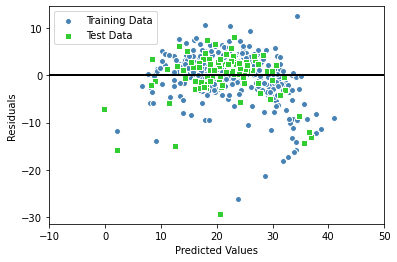

Coefficients: 
 [ 2.89556912e+00 -2.40286871e-01  5.59299658e-01 -1.05366827e-01
 -7.67931626e-01 -6.19536586e-01  6.66791594e-01 -2.79369230e-01
 -1.41197737e-01 -1.01755261e+00 -9.66242999e-01  4.57906074e-01
 -1.32764058e-01 -1.27945481e-01  3.23592942e-02  4.02659544e-02
  2.74293085e+00 -1.70235838e+01  4.48169721e+00 -6.42849583e-03
 -1.47039413e+00  2.56793051e-01 -1.05131783e-02 -8.92191033e-01
  1.30869818e-02 -5.01078827e-01]
Y Intercept: 
 29.01184117293078
MSE train:
25.250331603033896
MSE test:
27.29983796168165
R^2 train:
0.7093433606954564
R^2 test:
0.6277317658356927


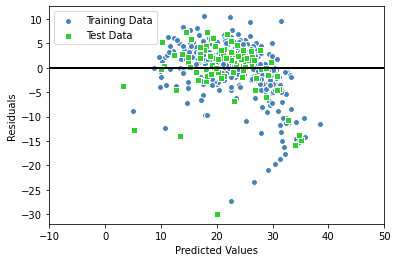

Coefficients: 
 [ 2.89556912e+00 -2.40286871e-01  5.59299658e-01 -1.05366827e-01
 -7.67931626e-01 -6.19536586e-01  6.66791594e-01 -2.79369230e-01
 -1.41197737e-01 -1.01755261e+00 -9.66242999e-01  4.57906074e-01
 -1.32764058e-01 -1.27945481e-01  3.23592942e-02  4.02659544e-02
  2.74293085e+00 -1.70235838e+01  4.48169721e+00 -6.42849583e-03
 -1.47039413e+00  2.56793051e-01 -1.05131783e-02 -8.92191033e-01
  1.30869818e-02 -5.01078827e-01]
Y Intercept: 
 29.01184117293078
MSE train:
29.976514569362227
MSE test:
29.03203689265264
R^2 train:
0.6549402550520311
R^2 test:
0.6041110162122341
[0.6368619255489565, 0.6368547706382686, 0.6367835484572277, 0.6361187457005186, 0.6339582689284005, 0.6339378554998529, 0.6330137568616474, 0.6277317658356927, 0.6041110162122341]


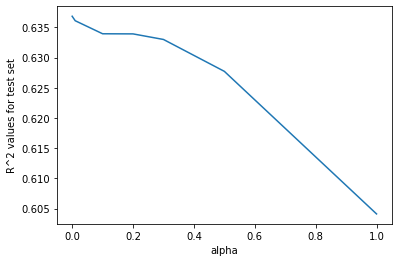

In [19]:
from sklearn.linear_model import Ridge
arr =[0.00001,0.0001,0.001,0.01,0.1,0.2,0.3,0.5,1]
R2score=[]
for i in  arr:
    ridge = Ridge(alpha=i,normalize =True)
    ridge.fit(X_train,y_train)
    y_train_pred =ridge.predict(X_train)
    y_test_pred =ridge.predict(X_test)
    plt.scatter(y_train_pred,y_train_pred-y_train,c='steelblue',marker='o',edgecolor='white',label='Training Data')
    plt.scatter(y_test_pred,y_test_pred-y_test,c='limegreen',marker='s',edgecolor='white',label='Test Data')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.hlines(y=0,xmin =-10,xmax =50,color ='black',lw=2)
    plt.xlim([-10,50])
    plt.show()
    print('Coefficients: \n', slr.coef_)
    print('Y Intercept: \n', slr.intercept_)
    print('MSE train:')
    print(mean_squared_error(y_train,y_train_pred))
    print('MSE test:')
    print(mean_squared_error(y_test,y_test_pred))
    print('R^2 train:')
    print(r2_score(y_train,y_train_pred))
    print('R^2 test:')
    R2score.append(r2_score(y_test,y_test_pred))
    print(r2_score(y_test,y_test_pred))
print(R2score)
plt.plot(arr,R2score)
plt.xlabel('alpha')
plt.ylabel('R^2 values for test set')
plt.show()

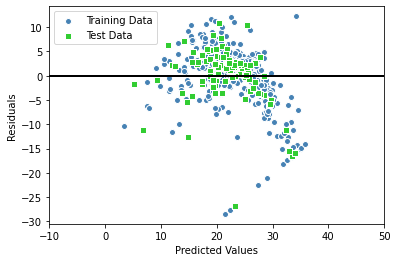

Coefficients: 
 [ 2.89556912e+00 -2.40286871e-01  5.59299658e-01 -1.05366827e-01
 -7.67931626e-01 -6.19536586e-01  6.66791594e-01 -2.79369230e-01
 -1.41197737e-01 -1.01755261e+00 -9.66242999e-01  4.57906074e-01
 -1.32764058e-01 -1.27945481e-01  3.23592942e-02  4.02659544e-02
  2.74293085e+00 -1.70235838e+01  4.48169721e+00 -6.42849583e-03
 -1.47039413e+00  2.56793051e-01 -1.05131783e-02 -8.92191033e-01
  1.30869818e-02 -5.01078827e-01]
Y Intercept: 
 29.01184117293078
MSE train:
33.768164964061114
MSE test:
30.617500233710224
R^2 train:
0.6112945565136204
R^2 test:
0.5824911941775324


In [20]:
# lasso Regression
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1,normalize =True)
lasso.fit(X_train,y_train)
y_train_pred =lasso.predict(X_train)
y_test_pred =lasso.predict(X_test)
plt.scatter(y_train_pred,y_train_pred-y_train,c='steelblue',marker='o',edgecolor='white',label='Training Data')
plt.scatter(y_test_pred,y_test_pred-y_test,c='limegreen',marker='s',edgecolor='white',label='Test Data')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0,xmin =-10,xmax =50,color ='black',lw=2)
plt.xlim([-10,50])
plt.show()
print('Coefficients: \n', slr.coef_)
print('Y Intercept: \n', slr.intercept_)
print('MSE train:')
print(mean_squared_error(y_train,y_train_pred))
print('MSE test:')
print(mean_squared_error(y_test,y_test_pred))
print('R^2 train:')
print(r2_score(y_train,y_train_pred))
print('R^2 test:')
print(r2_score(y_test,y_test_pred))

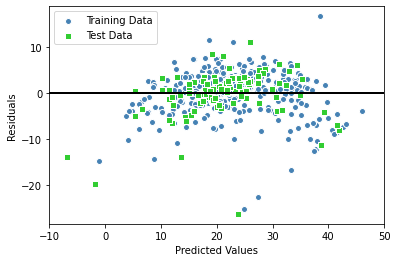

Coefficients: 
 [ 2.89556912e+00 -2.40286871e-01  5.59299658e-01 -1.05366827e-01
 -7.67931626e-01 -6.19536586e-01  6.66791594e-01 -2.79369230e-01
 -1.41197737e-01 -1.01755261e+00 -9.66242999e-01  4.57906074e-01
 -1.32764058e-01 -1.27945481e-01  3.23592942e-02  4.02659544e-02
  2.74293085e+00 -1.70235838e+01  4.48169721e+00 -6.42849583e-03
 -1.47039413e+00  2.56793051e-01 -1.05131783e-02 -8.92191033e-01
  1.30869818e-02 -5.01078827e-01]
Y Intercept: 
 29.01184117293078
MSE train:
20.61284680739615
MSE test:
26.63023732547903
R^2 train:
0.7627254614423642
R^2 test:
0.6368626275933458


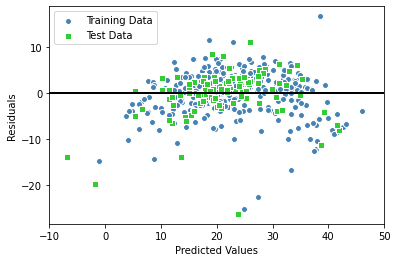

Coefficients: 
 [ 2.89556912e+00 -2.40286871e-01  5.59299658e-01 -1.05366827e-01
 -7.67931626e-01 -6.19536586e-01  6.66791594e-01 -2.79369230e-01
 -1.41197737e-01 -1.01755261e+00 -9.66242999e-01  4.57906074e-01
 -1.32764058e-01 -1.27945481e-01  3.23592942e-02  4.02659544e-02
  2.74293085e+00 -1.70235838e+01  4.48169721e+00 -6.42849583e-03
 -1.47039413e+00  2.56793051e-01 -1.05131783e-02 -8.92191033e-01
  1.30869818e-02 -5.01078827e-01]
Y Intercept: 
 29.01184117293078
MSE train:
20.612850176123732
MSE test:
26.630921134829283
R^2 train:
0.7627254226649314
R^2 test:
0.6368533029775849


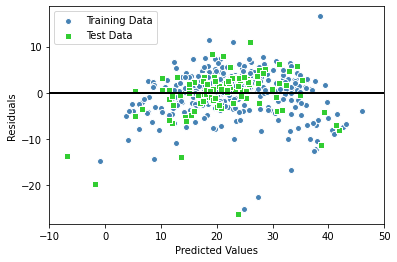

Coefficients: 
 [ 2.89556912e+00 -2.40286871e-01  5.59299658e-01 -1.05366827e-01
 -7.67931626e-01 -6.19536586e-01  6.66791594e-01 -2.79369230e-01
 -1.41197737e-01 -1.01755261e+00 -9.66242999e-01  4.57906074e-01
 -1.32764058e-01 -1.27945481e-01  3.23592942e-02  4.02659544e-02
  2.74293085e+00 -1.70235838e+01  4.48169721e+00 -6.42849583e-03
 -1.47039413e+00  2.56793051e-01 -1.05131783e-02 -8.92191033e-01
  1.30869818e-02 -5.01078827e-01]
Y Intercept: 
 29.01184117293078
MSE train:
20.613184879602112
MSE test:
26.637375735214544
R^2 train:
0.7627215698922344
R^2 test:
0.6367652862394992


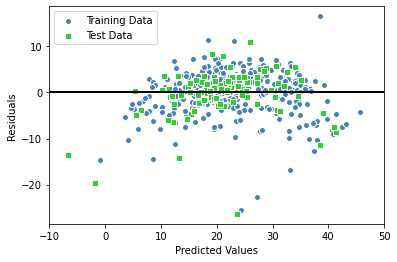

Coefficients: 
 [ 2.89556912e+00 -2.40286871e-01  5.59299658e-01 -1.05366827e-01
 -7.67931626e-01 -6.19536586e-01  6.66791594e-01 -2.79369230e-01
 -1.41197737e-01 -1.01755261e+00 -9.66242999e-01  4.57906074e-01
 -1.32764058e-01 -1.27945481e-01  3.23592942e-02  4.02659544e-02
  2.74293085e+00 -1.70235838e+01  4.48169721e+00 -6.42849583e-03
 -1.47039413e+00  2.56793051e-01 -1.05131783e-02 -8.92191033e-01
  1.30869818e-02 -5.01078827e-01]
Y Intercept: 
 29.01184117293078
MSE train:
20.646350892196466
MSE test:
26.738163891650885
R^2 train:
0.762339795826398
R^2 test:
0.63539091071852


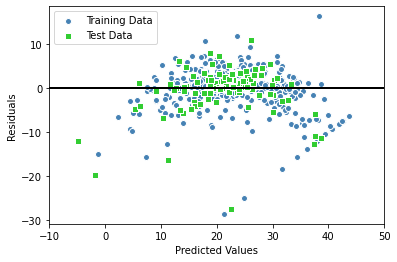

Coefficients: 
 [ 2.89556912e+00 -2.40286871e-01  5.59299658e-01 -1.05366827e-01
 -7.67931626e-01 -6.19536586e-01  6.66791594e-01 -2.79369230e-01
 -1.41197737e-01 -1.01755261e+00 -9.66242999e-01  4.57906074e-01
 -1.32764058e-01 -1.27945481e-01  3.23592942e-02  4.02659544e-02
  2.74293085e+00 -1.70235838e+01  4.48169721e+00 -6.42849583e-03
 -1.47039413e+00  2.56793051e-01 -1.05131783e-02 -8.92191033e-01
  1.30869818e-02 -5.01078827e-01]
Y Intercept: 
 29.01184117293078
MSE train:
22.19035102326826
MSE test:
28.810862270539715
R^2 train:
0.744566805901419
R^2 test:
0.6071270152863496


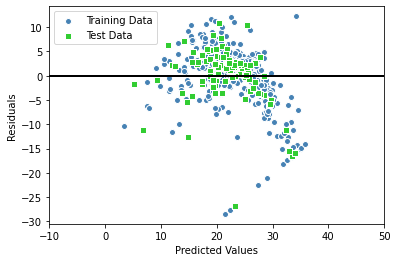

Coefficients: 
 [ 2.89556912e+00 -2.40286871e-01  5.59299658e-01 -1.05366827e-01
 -7.67931626e-01 -6.19536586e-01  6.66791594e-01 -2.79369230e-01
 -1.41197737e-01 -1.01755261e+00 -9.66242999e-01  4.57906074e-01
 -1.32764058e-01 -1.27945481e-01  3.23592942e-02  4.02659544e-02
  2.74293085e+00 -1.70235838e+01  4.48169721e+00 -6.42849583e-03
 -1.47039413e+00  2.56793051e-01 -1.05131783e-02 -8.92191033e-01
  1.30869818e-02 -5.01078827e-01]
Y Intercept: 
 29.01184117293078
MSE train:
33.768164964061114
MSE test:
30.617500233710224
R^2 train:
0.6112945565136204
R^2 test:
0.5824911941775324


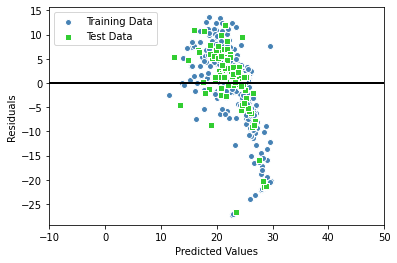

Coefficients: 
 [ 2.89556912e+00 -2.40286871e-01  5.59299658e-01 -1.05366827e-01
 -7.67931626e-01 -6.19536586e-01  6.66791594e-01 -2.79369230e-01
 -1.41197737e-01 -1.01755261e+00 -9.66242999e-01  4.57906074e-01
 -1.32764058e-01 -1.27945481e-01  3.23592942e-02  4.02659544e-02
  2.74293085e+00 -1.70235838e+01  4.48169721e+00 -6.42849583e-03
 -1.47039413e+00  2.56793051e-01 -1.05131783e-02 -8.92191033e-01
  1.30869818e-02 -5.01078827e-01]
Y Intercept: 
 29.01184117293078
MSE train:
50.43406400642046
MSE test:
43.460189146273194
R^2 train:
0.4194533449685429
R^2 test:
0.40736469232386185


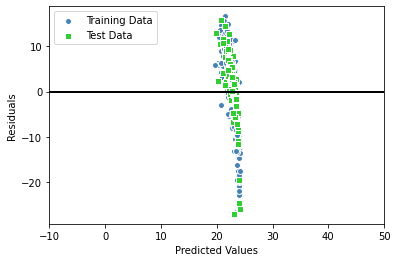

Coefficients: 
 [ 2.89556912e+00 -2.40286871e-01  5.59299658e-01 -1.05366827e-01
 -7.67931626e-01 -6.19536586e-01  6.66791594e-01 -2.79369230e-01
 -1.41197737e-01 -1.01755261e+00 -9.66242999e-01  4.57906074e-01
 -1.32764058e-01 -1.27945481e-01  3.23592942e-02  4.02659544e-02
  2.74293085e+00 -1.70235838e+01  4.48169721e+00 -6.42849583e-03
 -1.47039413e+00  2.56793051e-01 -1.05131783e-02 -8.92191033e-01
  1.30869818e-02 -5.01078827e-01]
Y Intercept: 
 29.01184117293078
MSE train:
75.48726415548984
MSE test:
64.41786034290773
R^2 train:
0.1310658863944284
R^2 test:
0.12158001991964829


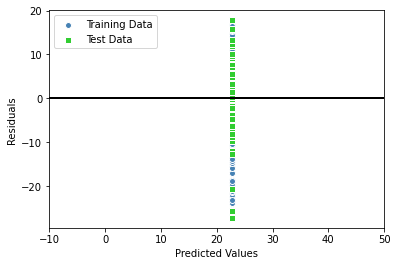

Coefficients: 
 [ 2.89556912e+00 -2.40286871e-01  5.59299658e-01 -1.05366827e-01
 -7.67931626e-01 -6.19536586e-01  6.66791594e-01 -2.79369230e-01
 -1.41197737e-01 -1.01755261e+00 -9.66242999e-01  4.57906074e-01
 -1.32764058e-01 -1.27945481e-01  3.23592942e-02  4.02659544e-02
  2.74293085e+00 -1.70235838e+01  4.48169721e+00 -6.42849583e-03
 -1.47039413e+00  2.56793051e-01 -1.05131783e-02 -8.92191033e-01
  1.30869818e-02 -5.01078827e-01]
Y Intercept: 
 29.01184117293078
MSE train:
86.87340383295755
MSE test:
75.04543037399255
R^2 train:
0.0
R^2 test:
-0.023340500652033302


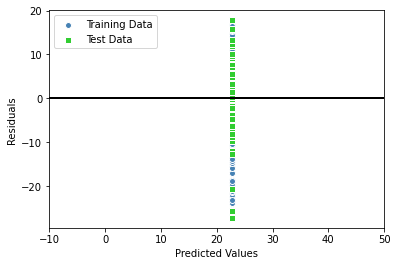

Coefficients: 
 [ 2.89556912e+00 -2.40286871e-01  5.59299658e-01 -1.05366827e-01
 -7.67931626e-01 -6.19536586e-01  6.66791594e-01 -2.79369230e-01
 -1.41197737e-01 -1.01755261e+00 -9.66242999e-01  4.57906074e-01
 -1.32764058e-01 -1.27945481e-01  3.23592942e-02  4.02659544e-02
  2.74293085e+00 -1.70235838e+01  4.48169721e+00 -6.42849583e-03
 -1.47039413e+00  2.56793051e-01 -1.05131783e-02 -8.92191033e-01
  1.30869818e-02 -5.01078827e-01]
Y Intercept: 
 29.01184117293078
MSE train:
86.87340383295755
MSE test:
75.04543037399255
R^2 train:
0.0
R^2 test:
-0.023340500652033302
[0.6368626275933458, 0.6368533029775849, 0.6367652862394992, 0.63539091071852, 0.6071270152863496, 0.5824911941775324, 0.40736469232386185, 0.12158001991964829, -0.023340500652033302, -0.023340500652033302]


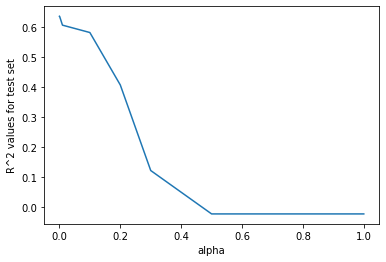

In [24]:
from sklearn.linear_model import Lasso
arr =[0.0000001,0.00001,0.0001,0.001,0.01,0.1,0.2,0.3,0.5,1]
R2=[]
for i in  arr:
    lasso = Lasso(alpha=i,normalize =True)
    lasso.fit(X_train,y_train)
    y_train_pred =lasso.predict(X_train)
    y_test_pred =lasso.predict(X_test)
    plt.scatter(y_train_pred,y_train_pred-y_train,c='steelblue',marker='o',edgecolor='white',label='Training Data')
    plt.scatter(y_test_pred,y_test_pred-y_test,c='limegreen',marker='s',edgecolor='white',label='Test Data')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.hlines(y=0,xmin =-10,xmax =50,color ='black',lw=2)
    plt.xlim([-10,50])
    plt.show()
    print('Coefficients: \n', slr.coef_)
    print('Y Intercept: \n', slr.intercept_)
    print('MSE train:')
    print(mean_squared_error(y_train,y_train_pred))
    print('MSE test:')
    print(mean_squared_error(y_test,y_test_pred))
    print('R^2 train:')
    print(r2_score(y_train,y_train_pred))
    print('R^2 test:')
    print(r2_score(y_test,y_test_pred))
    R2.append(r2_score(y_test,y_test_pred))
print(R2)
plt.plot(arr,R2)
plt.xlabel('alpha')
plt.ylabel('R^2 values for test set')
plt.show()